In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time, math

In [89]:
filename = "Colin_035221.txt"

In [70]:
filename = "WSAS12.txt"

In [90]:
data = pd.read_json(filename)

In [91]:
data['address'] = pd.io.json.json_normalize(data[:]['message'])['address']
data['value'] = pd.io.json.json_normalize(data[:]['message'])['args']
data['value'] = data['value'].str[0]
data = data.drop(columns=['message'])

In [5]:
data

,time,address,value
0,4440,/spr_beta_alpha,0.341182
1,4458,/spr_alpha_theta,0.210655
2,5652,/td_front_back,1.024810
3,8537,/spr_beta_alpha,0.318232
4,8548,/spr_alpha_theta,0.172182
5,8699,/fp_wpli_left_midline,0.000000
6,8705,/fp_wpli_left_lateral,0.000000
7,8708,/fp_wpli_right_midline,0.078526
8,8712,/fp_wpli_right_lateral,0.097842
9,9334,/td_front_back,1.062944


In [15]:
data['time'] = data['time']/4;

In [16]:
data['time'] = data['time'].astype('int')

In [8]:
data.to_json(orient='index')

'{"0":{"time":4490,"address":"\\/spr_beta_alpha","value":0.2915885746},"1":{"time":4491,"address":"\\/spr_alpha_theta","value":0.2940101326},"2":{"time":4656,"address":"\\/td_front_back","value":1.1048494577},"3":{"time":9417,"address":"\\/spr_beta_alpha","value":0.2398335487},"4":{"time":9418,"address":"\\/spr_alpha_theta","value":0.307153672},"5":{"time":9425,"address":"\\/fp_wpli_left_midline","value":0.0871980637},"6":{"time":9426,"address":"\\/fp_wpli_left_lateral","value":0.043302387},"7":{"time":9426,"address":"\\/fp_wpli_right_midline","value":0.052274406},"8":{"time":9426,"address":"\\/fp_wpli_right_lateral","value":0.0777927861},"9":{"time":9569,"address":"\\/fp_dpli_left_midline","value":0.4965426028},"10":{"time":9569,"address":"\\/fp_dpli_left_lateral","value":0.4903680086},"11":{"time":9570,"address":"\\/fp_dpli_right_midline","value":0.5057612062},"12":{"time":9570,"address":"\\/fp_dpli_right_lateral","value":0.4997333288},"13":{"time":9586,"address":"\\/pe_frontal","val

In [7]:
data.head()

,time,address,value
0,4490,/spr_beta_alpha,0.291589
1,4491,/spr_alpha_theta,0.294010
2,4656,/td_front_back,1.104849
3,9417,/spr_beta_alpha,0.239834
4,9418,/spr_alpha_theta,0.307154


In [17]:
channels = [
    '/fp_dpli_left_midline',
    '/fp_dpli_left_lateral',
    '/fp_dpli_right_midline', 
    '/fp_dpli_right_lateral',
    '/fp_wpli_left_midline', 
    '/fp_wpli_left_lateral', 
    '/fp_wpli_right_midline', 
    '/fp_wpli_right_lateral', 
    '/hl_relative_position',
    '/pe_frontal', 
    '/pe_parietal', 
    '/pac_rpt_frontal', 
    '/pac_rpt_parietal', 
    '/spr_beta_alpha', 
    '/spr_alpha_theta', 
    '/td_front_back']

In [8]:
data.loc[data['address'] == channels[8]].head(700)

,time,address,value
16,13074,/hl_relative_position,0.544499
33,23118,/hl_relative_position,0.394293
52,33141,/hl_relative_position,0.094897
69,43132,/hl_relative_position,0.999394
86,53105,/hl_relative_position,0.707994
105,63046,/hl_relative_position,0.162304
122,72971,/hl_relative_position,0.513248
139,82935,/hl_relative_position,0.583691
158,92938,/hl_relative_position,0.999394
175,102971,/hl_relative_position,0.999394


Text(0.5, 1.0, 'dPLI, size: wPLI')

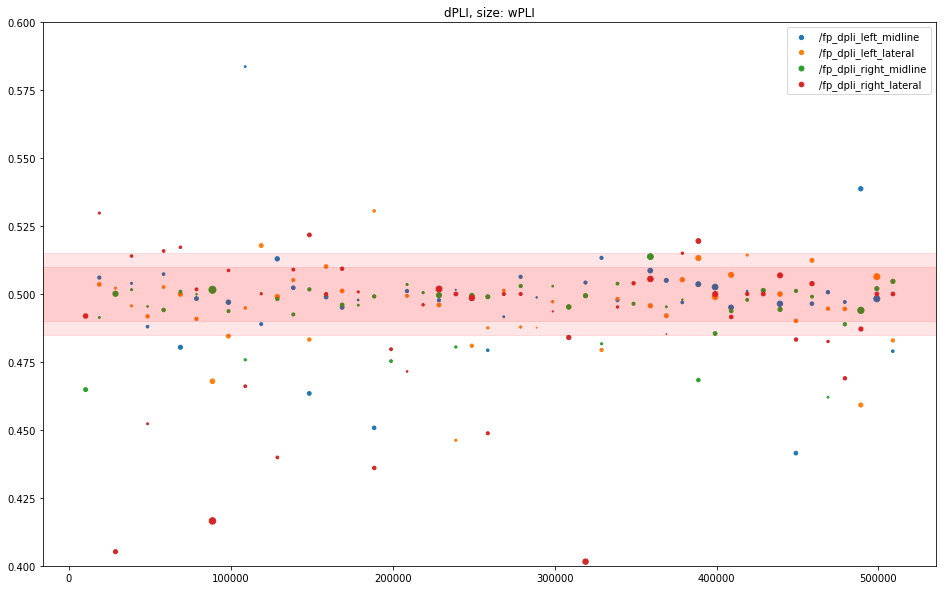

In [92]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.legend((lm, ll, rm, rl), (channels[0], channels[1], channels[2], channels[3]))
plt.ymin = 0.4
plt.ymax = 0.6

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

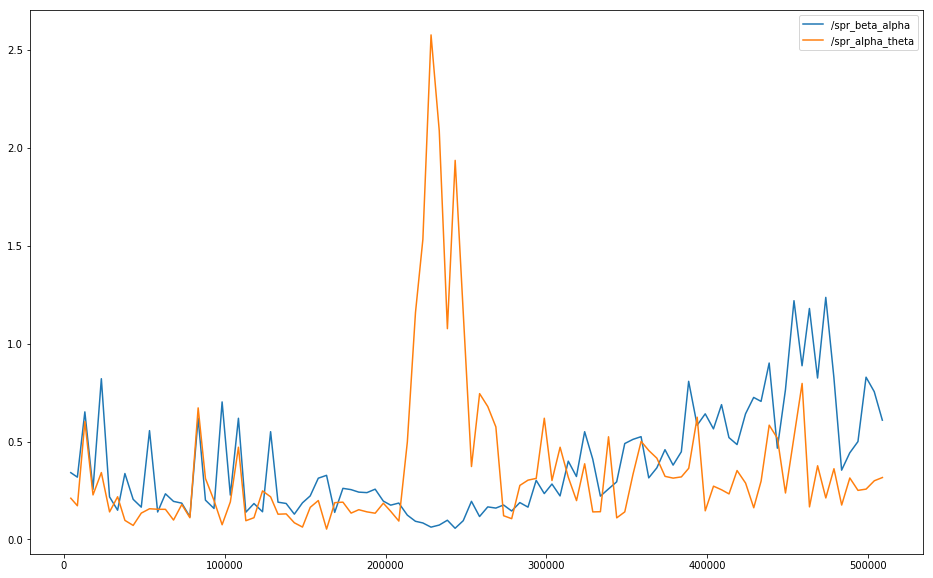

In [93]:
fig, ax = plt.subplots(figsize=(16,10))
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
ax.legend()

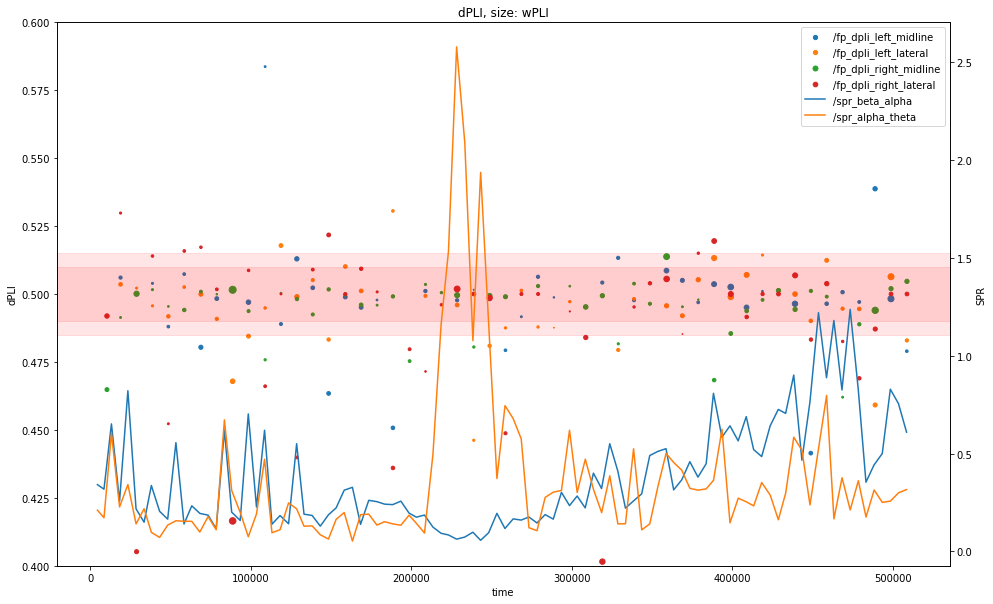

In [94]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

ax2 = ax.twinx()
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])

ax2.set_ylabel('SPR')
handles, labels = ax2.get_legend_handles_labels()

plt.legend((lm, ll, rm, rl, handles[0], handles[1]), (channels[0], channels[1], channels[2], channels[3], channels[13], channels[14]))

In [57]:
data

,time,address,value
0,4349,/spr_beta_alpha,0.163351
1,4353,/spr_alpha_theta,0.271697
2,3699,/spr_beta_alpha,0.163351
3,3703,/spr_alpha_theta,0.271697
4,4906,/td_front_back,1.090777
5,7795,/spr_beta_alpha,0.149327
6,7798,/spr_alpha_theta,0.335320
7,8253,/fp_wpli_left_midline,0.136242
8,8257,/fp_wpli_left_lateral,0.153304
9,8258,/fp_wpli_right_midline,0.191330


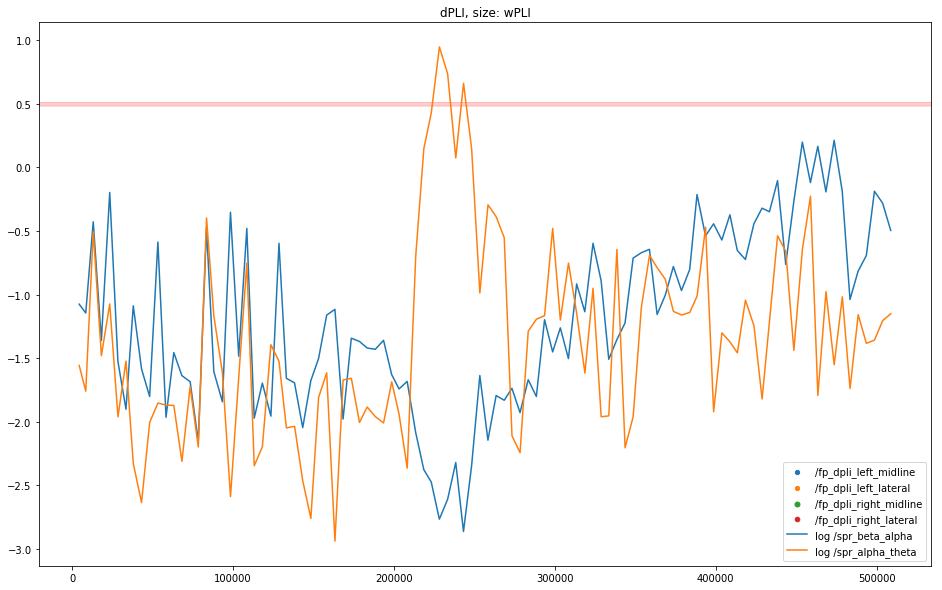

In [95]:
fig, ax = plt.subplots(figsize=(16,10))
# ax.set(ylim=(0.4, 0.6))
# lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
#             s=data.loc[data['address'] == channels[4]]['value']*200)
# ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
#             s=data.loc[data['address'] == channels[5]]['value']*200)
# rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
#             s=data.loc[data['address'] == channels[6]]['value']*200)
# rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
#             s=data.loc[data['address'] == channels[7]]['value']*200)
# plt.ymin = 0.4
# plt.ymax = 0.6
# ax.set_ylabel('dPLI')
# ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

# ax2 = ax.twinx()
ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], np.log(data.loc[data['address'] == channels[13]]['value']))
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], np.log(data.loc[data['address'] == channels[14]]['value']))
ax2.set_ylabel('log SPR')
handles, labels = ax2.get_legend_handles_labels()

plt.legend((lm, ll, rm, rl, handles[0], handles[1]), (channels[0], channels[1], channels[2], channels[3], 'log ' + channels[13], 'log '
                                                       + channels[14]))

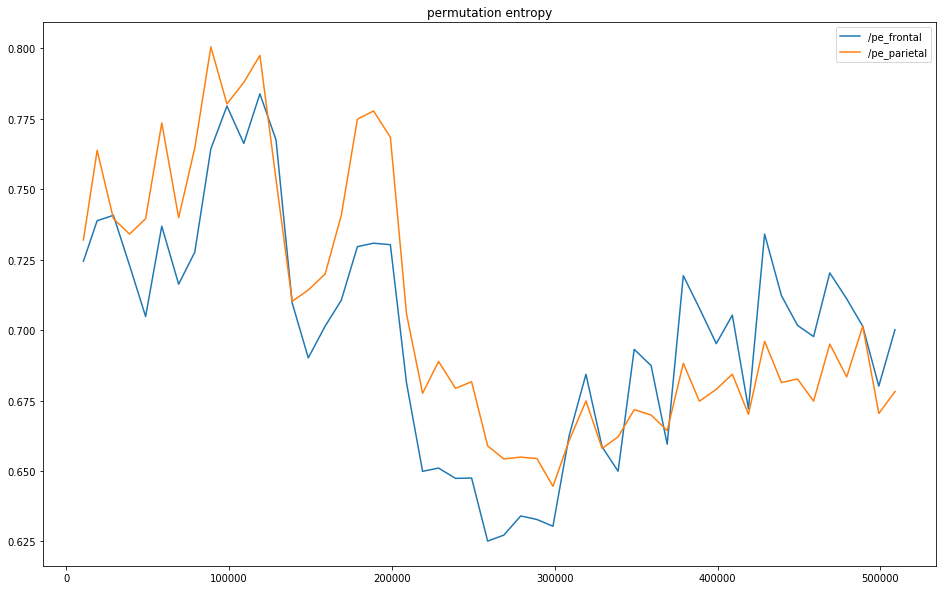

In [96]:
fig, ax = plt.subplots(figsize=(16,10))
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
plt.title('permutation entropy')
ax.legend()

In [43]:
hub_location = data.loc[data['address'] == channels[8]]

In [53]:
pd.options.display.max_rows = None

In [56]:
hub_location['time']

18        11988
35        21773
54        31547
71        41772
88        51552
107       61758
124       71428
131       81600
140       91708
147      101409
154      111618
163      121800
170      131536
177      141733
186      151931
193      161630
200      171825
209      181952
216      191665
223      201873
232      212070
239      221702
246      231899
255      242109
262      251719
269      261888
278      272041
285      281744
292      291970
301      302156
308      311891
315      322119
324      331816
331      342088
338      351765
347      362008
354      372197
361      381906
370      392127
377      402328
384      412051
393      422234
400      431938
404      442169
405      452356
406      462040
407      472241
408      481913
409      492036
410      502195
411      512365
412      522055
413      532287
414      542475
415      552204
416      562390
417      572058
434       12040
451       21769
470       31563
487       41742
504       51887
523     

In [55]:
data.loc[data['address'] == channels[8]]['value']

18      0.379239
35      0.579878
54      0.544468
71      0.513224
88      0.937803
107     0.094894
124     0.725683
131     0.379239
140     0.094894
147     0.868485
154     0.094894
163     0.021507
170     0.094894
177     0.248934
186     0.000000
193     0.999370
200     0.239392
209     0.868485
216     0.868485
223     0.544468
232     0.868485
239     0.868485
246     0.868485
255     0.868485
262     0.868485
269     0.579878
278     0.868485
285     0.000000
292     0.919638
301     0.868485
308     0.379239
315     0.379239
324     0.919638
331     0.094894
338     0.094894
347     0.000000
354     0.000000
361     0.379239
370     0.379239
377     0.868485
384     0.094894
393     0.868485
400     0.868485
404     0.868485
405     0.094894
406     0.868485
407     0.868485
408     0.868485
409     0.868485
410     0.868485
411     0.868485
412     0.094894
413     0.513224
414     0.000000
415     0.021507
416     0.868485
417     0.513224
434     0.811955
451     0.7256

In [ ]:
data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value']

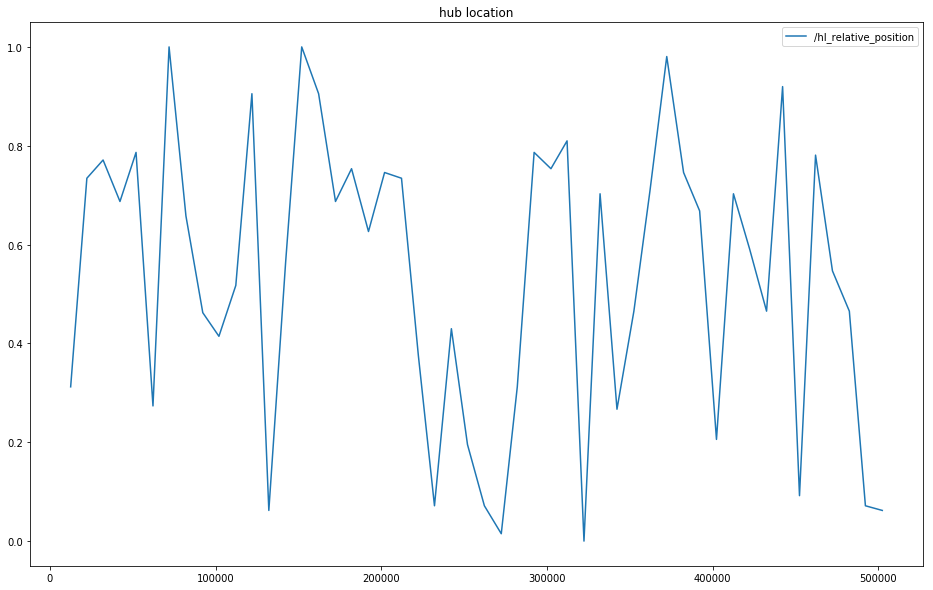

In [97]:
fig, ax = plt.subplots(figsize=(16,10))
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
plt.title('hub location')
ax.legend()

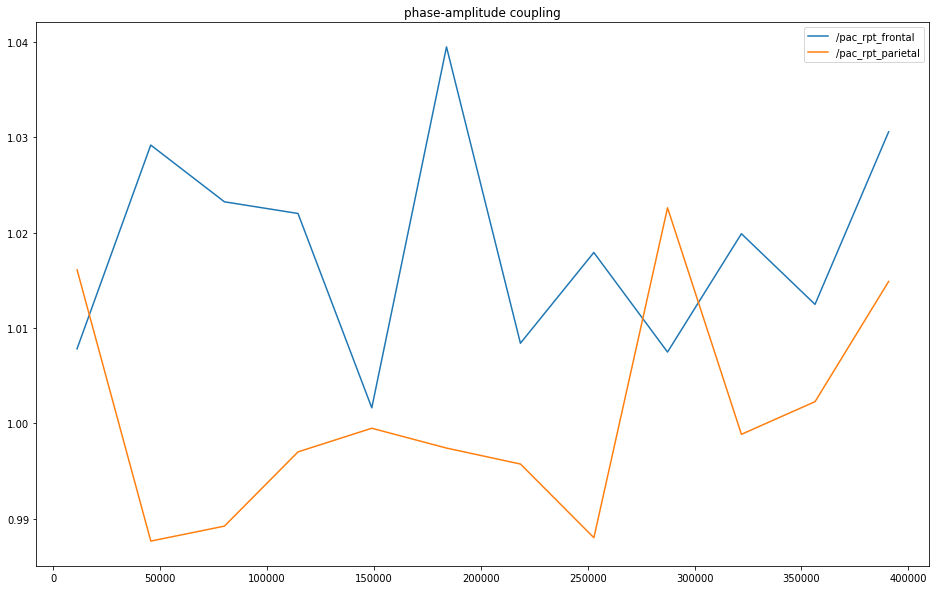

In [87]:
fig, ax = plt.subplots(figsize=(16,10))
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
plt.title('phase-amplitude coupling')
ax.legend()

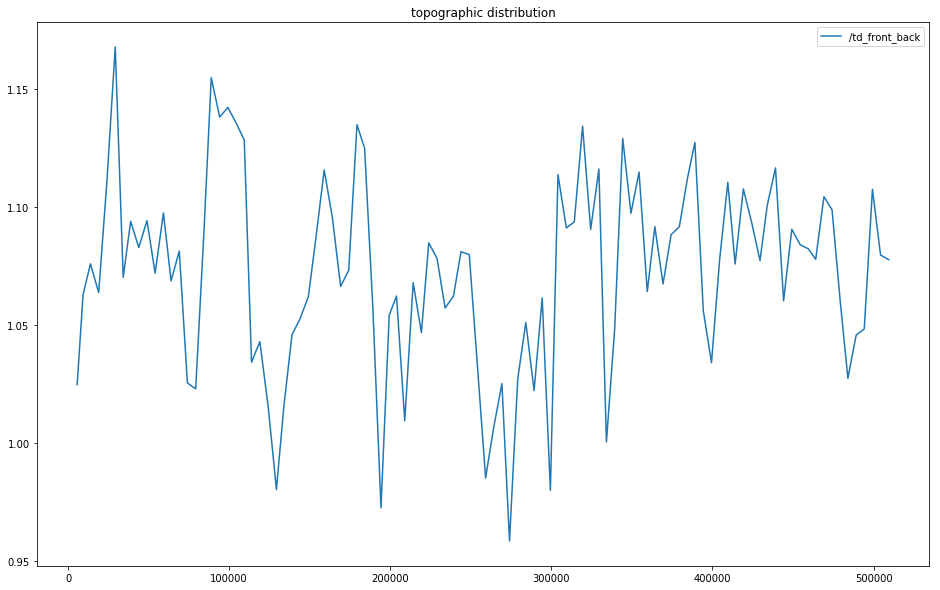

In [98]:
fig, ax = plt.subplots(figsize=(16,10))
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])
plt.title('topographic distribution')
ax.legend()

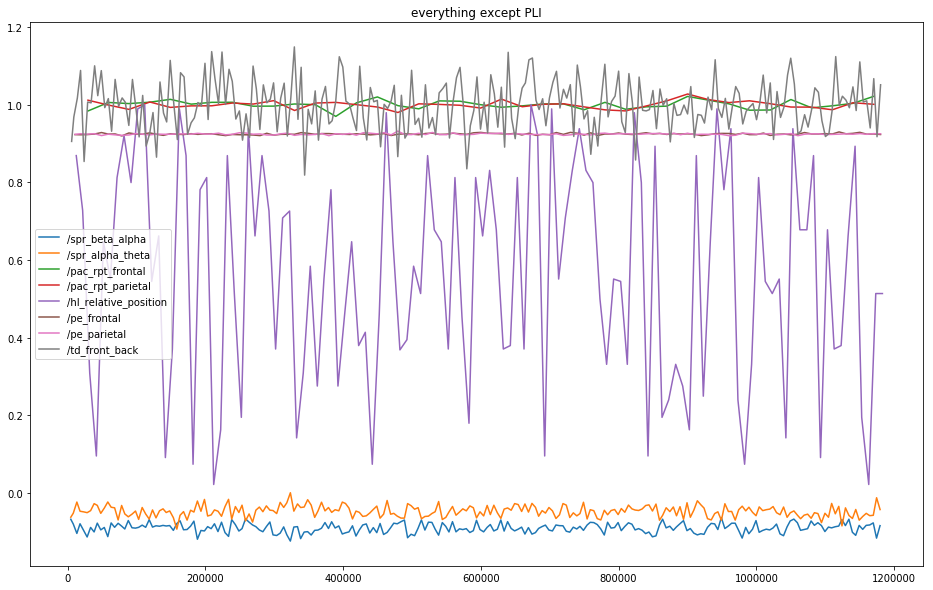

In [15]:
fig, ax = plt.subplots(figsize=(16,10))

ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])

plt.title('everything except PLI')
ax.legend()

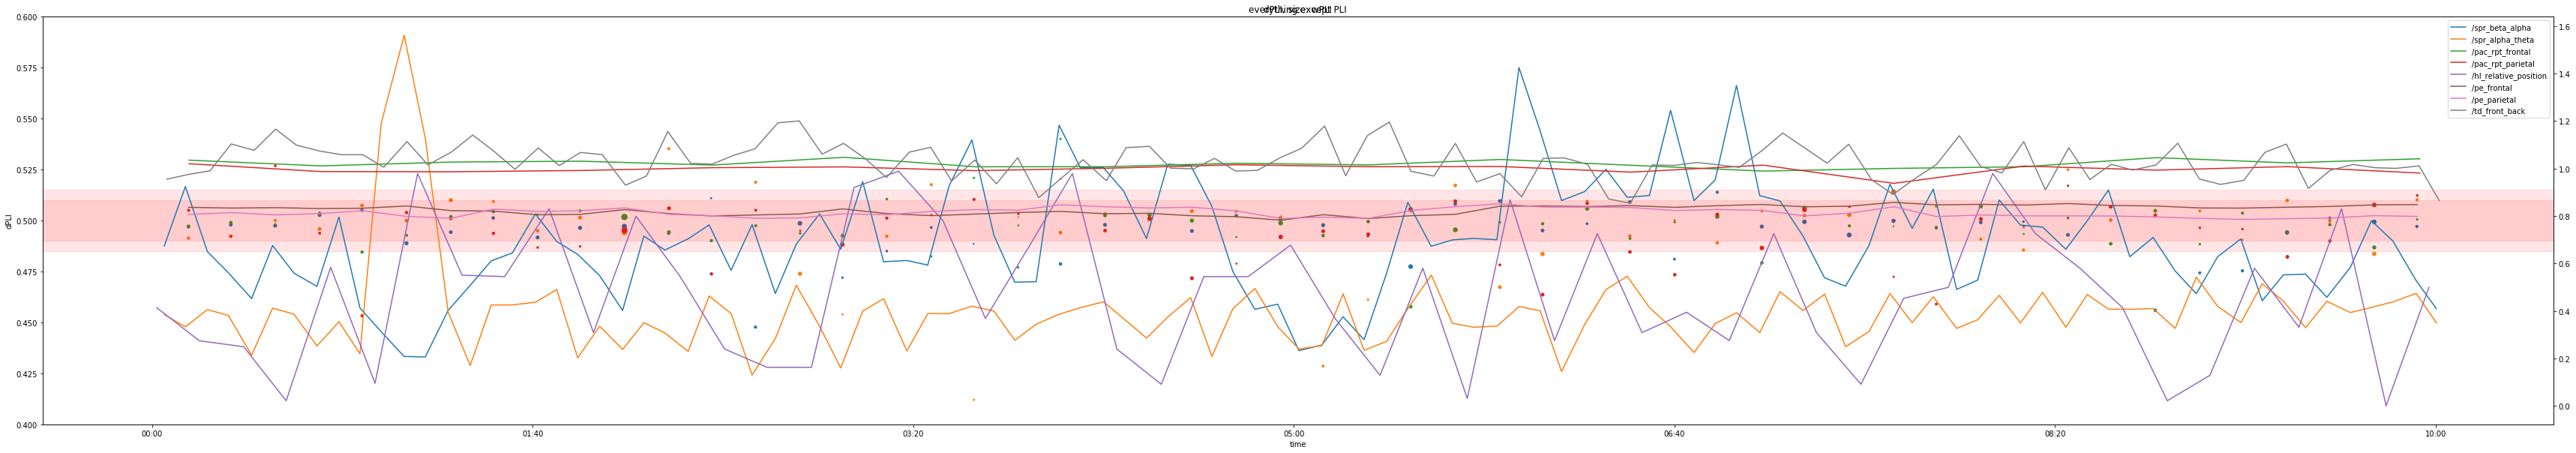

In [40]:
fig, ax = plt.subplots(figsize=(60,10))

ax.set(ylim=(0.4, 0.6))
lm = plt.scatter(data.loc[data['address'] == channels[0]]['time'], data.loc[data['address'] == channels[0]]['value'], 
            s=data.loc[data['address'] == channels[4]]['value']*200)
ll = plt.scatter(data.loc[data['address'] == channels[1]]['time'], data.loc[data['address'] == channels[1]]['value'], 
            s=data.loc[data['address'] == channels[5]]['value']*200)
rm = plt.scatter(data.loc[data['address'] == channels[2]]['time'], data.loc[data['address'] == channels[2]]['value'], 
            s=data.loc[data['address'] == channels[6]]['value']*200)
rl = plt.scatter(data.loc[data['address'] == channels[3]]['time'], data.loc[data['address'] == channels[3]]['value'], 
            s=data.loc[data['address'] == channels[7]]['value']*200)
plt.ymin = 0.4
plt.ymax = 0.6
ax.set_ylabel('dPLI')
ax.set_xlabel('time')

plt.axhspan(0.485, 0.515, color='red', alpha=0.1)
plt.axhspan(0.49, 0.51, color='red', alpha=0.1)
plt.title('dPLI, size: wPLI')

ax2 = ax.twinx()

ba = plt.plot(data.loc[data['address'] == channels[13]]['time'], data.loc[data['address'] == channels[13]]['value'], label=channels[13])
at = plt.plot(data.loc[data['address'] == channels[14]]['time'], data.loc[data['address'] == channels[14]]['value'], label=channels[14])
pacf = plt.plot(data.loc[data['address'] == channels[11]]['time'], data.loc[data['address'] == channels[11]]['value'], label=channels[11])
pacp = plt.plot(data.loc[data['address'] == channels[12]]['time'], data.loc[data['address'] == channels[12]]['value'], label=channels[12])
hl = plt.plot(data.loc[data['address'] == channels[8]]['time'], data.loc[data['address'] == channels[8]]['value'], label=channels[8])
pef = plt.plot(data.loc[data['address'] == channels[9]]['time'], data.loc[data['address'] == channels[9]]['value'], label=channels[9])
pep = plt.plot(data.loc[data['address'] == channels[10]]['time'], data.loc[data['address'] == channels[10]]['value'], label=channels[10])
td = plt.plot(data.loc[data['address'] == channels[15]]['time'], data.loc[data['address'] == channels[15]]['value'], label=channels[15])

plt.title('everything except PLI')

formatter = mpl.ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)

handles, labels = ax2.get_legend_handles_labels()
ax.legend(handles, labels)